## EAS 503 Homework 2 Submission
Name - _Enter your name here_

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw2.ipynb**


### Submission Details 
* **Due Date** - October 16, 2018 by 11:59 PM EST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 4 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Inheritance and Encapsulation (15 points)

Consider a class of credit card accounts. A credit card account can have 2 types of credit cards:
1. Primary card  
2. Supplement card (Sup-card)

Consider the following attributes of the cards:

- A primary account is the main account to which multiple sup-cards are linked. 

- The primary credit card holder will be responsible for the bill payments for all the transactions on the primary card itself as well as all its supplimentary cards. 

- There are two types of credit limits:

    1. Individual card limit (limiting the expenditure per card)

    2. Account limit (limiting the total expenditure on primiary and the related sup-cards)

$$Account\ Limit >= Individual\ Card\ Limit$$

- There are two types of expenditure (or balances):

    1. Individual card expenditure (different for each card irrespective of primary or otherwise)

    2. Account expenditure (total spending on primary and all the related sup-cards)

$$Account\ expenditure = \Sigma(Individual\ card\ expenditure )$$ 


- Each sup-card has the same account limit as the primary credit card in that account. The account limit is the max of all card limts in that account. 

- Any transaction over the permitted limits must be denied i.e. transactions cannot lead to account expenditures being more than account limits. Also, transactions cannot lead to individual card expenditures being more than individual card limit.

For this problem, design a class `PrimaryCard` with all the account details and primary credit card details included in the class. Construct a sub-class of supplementary card holder, `SupplementaryCard`, linked to a primary credit card account. Ensure that the sensitive details of all the accounts (credit card numbers, balance, account limit etc.) must saved and accessed securely. 

Use the `Account_details.txt` file to access the account details for 15 credit cards. The transaction details for the month of october are provided in `transaction.txt` file. Design an algorithm to update the account balance on all the accounts and plot the final account balance on each day for the month of october.

Example:
Suppose you have an account with 5 cards in it (1 primary and 4 sup-cards). 

Primary card limit= $100

Each sup-card limit=$30

Restrictions:

- Account limit is $100 (max of 100 and 30)

- Primary card cannot spend more than $100

- All cards together cannot spend more than $100

- Any sup-card cannot spend more than $30

In [40]:
#import os
#base_path = "C:\\Users\\ABLO\\Downloads"
#transaction = "transaction.txt"
#path_to_file = os.path.join(base_path, transaction)
#print (path_to_file)
#fd = open(transaction , 'r')
#print (fd)
#fd.read()
transaction = "transaction.txt"

with open(transaction, 'r') as fin:
    print(fin.read())
Account_details = "Account_details.txt"

with open(Account_details, 'r') as fin:
    print(fin.read())   


Customer_ID	Transaction_amount	Date
7	21.3	10/1/2017
2	24.6	10/1/2017
3	9.3	10/1/2017
12	45.9	10/1/2017
15	62	10/1/2017
1	7.7	10/2/2017
15	57.2	10/2/2017
3	54.5	10/2/2017
7	18.2	10/2/2017
10	56.4	10/2/2017
7	46	10/2/2017
10	61.6	10/3/2017
3	39.5	10/3/2017
14	500	10/3/2017
9	17.7	10/4/2017
6	13.6	10/4/2017
15	33.1	10/4/2017
2	20.1	10/5/2017
8	27	10/5/2017
10	38.2	10/6/2017
5	49.8	10/6/2017
10	3.7	10/6/2017
6	11.1	10/7/2017
14	37.7	10/7/2017
13	14.8	10/7/2017
8	25.4	10/8/2017
10	7.7	10/8/2017
13	38.7	10/8/2017
12	80	10/9/2017
11	3500	10/9/2017
2	32.4	10/9/2017
5	76.2	10/10/2017
15	24.5	10/10/2017
13	24.1	10/11/2017
12	208.1	10/12/2017
10	17.7	10/12/2017
9	62.8	10/12/2017
12	42.2	10/12/2017
14	27.6	10/14/2017
14	70.9	10/14/2017
2	71	10/14/2017
14	7.6	10/15/2017
8	24.6	10/15/2017
4	64.7	10/15/2017
11	40.2	10/16/2017
7	27.4	10/16/2017
1	670	10/16/2017
6	69.6	10/17/2017
7	62.4	10/17/2017
2	54	10/17/2017
4	18.9	10/17/2017
4	72.7	10/17/2017
1	39.9	10/17/2017
8	18.8	10/18/2017
2	45.4	10/18/2017

In [184]:
#Enter your solution here

class PrimaryCard:
    TotalBalance = 0
    def __init__(self, Card_ID, Card_Number, Account_Number, Primary_or_Sub, Account_Limit, Current_Balance_within_card):
        self.__Card_ID = Card_ID
        self.__Card_Number = Card_Number
        self.__Account_Number = Account_Number
        self.__Account_Limit = Account_Limit
        self.__Primary_or_Sub = Primary_or_Sub
        self.__Current_Balance_within_Primary_card = Current_Balance_within_card
        self.TotalBalance = Current_Balance_within_card
        
    #Get card information
    def Get_ID(self):
        return self.__Card_ID
    def Get_Card_Number(self):
        return self.__Card_Number
    def Get_Primary_or_Sub(self):
        return self.__Primary_or_Sub
    def Get_Account_Number(self):
        return self.__Account_Number
    
    #Seter and Getter for the account
    def Set_Account_Balance(self, sub_balance):
        self.TotalBalance = self.TotalBalance + sub_balance
    def Get_Account_Balance(self):
        return self.TotalBalance
    def Get_Account_Limit(self):
        return self.__Account_Limit
    def Set_Card_Balance(self, deposit):
        self.__Current_Balance_within_Primary_card = self.__Current_Balance_within_Primary_card + deposit
    def Get_Card_Balance(self, deposit):
        return self.__Current_Balance_within_Primary_card
    def Deposit_Account(self, deposit):
        Balance = self.Get_Account_Balance() + deposit
        if Balance > self.Get_Account_Limit():
            
            return 
        card_balance = self.__Current_Balance_within_Primary_card + deposit
        self.Set_Account_Balance(deposit)
        self.Set_Card_Balance(deposit)

class SupplementaryCard:
    def __init__(self, Card_ID, Card_Number, Account_Number, Primary_or_Sub, Card_Limit, Current_Balance_within_Sub_card,
                 Father_Card):
        self.__Card_ID = Card_ID
        self.__Sub_Card_Number = Card_Number
        self.__Sub_Account_Number = Account_Number
        self.__Primary_or_Sub = Primary_or_Sub
        self.__Card_Limit = Card_Limit
        self.__Current_Balance_within_Sub_card = Current_Balance_within_Sub_card
        self.__Father_card = Father_Card
    #Get card information
    def Get_Primary_or_Sub(self):
        return self.__Primary_or_Sub
    def Get_Account_Number(self):
        return self.__Account_Number
    def Get_Account_Limit(self):
        return self.__Card_Limit
    #Geter and seter for account
    def Get_Account_Balance(self):
        return self.__Father_card.Get_Account_Balance()
    def Set_Account_Balance(self, deposit):
        self.__Father_card.Set_Account_Balance(deposit)
    def Add_Card_Balance(self,deposit):
        self.__Current_Balance_within_Sub_card =self.__Current_Balance_within_Sub_card + deposit
    def Get_Card_Balance(self):
        return self.__Current_Balance_within_Sub_card
    def Deposit_Account(self, deposit):
        total_balance = self.Get_Account_Balance() + deposit
        if total_balance > self.Get_Account_Limit():
            #print("You excess the account limit!")
            return
        else:
            self.Set_Account_Balance(deposit)
            self.Add_Card_Balance(deposit)
            

import matplotlib.pyplot as plt
import numpy as np
primary_accounts = {}
accounts = {}
Accounts_Details = np.genfromtxt('./account_detail.txt', dtype=None, names=('ID','Card_Number', 'Account_Number', 'Primary_Sub', 'Card_Limit', 'Current_balance'),delimiter='\t', skip_header=1, usecols=(0,1,2,3,4,5), unpack=True)
for ID in Accounts_Details['ID']:
    if Accounts_Details['Primary_Sub'][ID-1] == b'P':
        primary_account = PrimaryCard(Accounts_Details['ID'][ID-1], Accounts_Details['Card_Number'][ID-1], Accounts_Details['Account_Number'][ID-1], 'P', Accounts_Details['Card_Limit'][ID-1], Accounts_Details['Current_balance'][ID-1])
        primary_accounts[primary_account.Get_Account_Number()] = primary_account
        accounts[ID] = primary_account
for ID in Accounts_Details['ID']:
    if Accounts_Details['Primary_Sub'][ID-1] == b'S':
        Account_Number = Accounts_Details['Account_Number'][ID-1]
        Primary_Card = primary_accounts[Account_Number]
        accounts[ID] = SupplementaryCard(Accounts_Details['ID'][ID-1], Accounts_Details['Card_Number'][ID-1], Accounts_Details['Account_Number'][ID-1], 'S', Accounts_Details['Card_Limit'][ID-1], Accounts_Details['Current_balance'][ID-1],Primary_Card)
        accounts[ID].Set_Account_Balance(accounts[ID].Get_Card_Balance())

transaction = np.genfromtxt('./transaction.txt', dtype=None, names=('ID','Transaction_Amount', 'Date'),
                            delimiter='\t', skip_header=1, usecols=(0,1,2), unpack=True)
record_date = {}
for record in transaction:
    finish_date = record['Date']
    if record['Date'] not in record_date.keys():
        record_date[record['Date']] = 1
    else:
        record_date[record['Date']] = record_date[record['Date']] + 1
List_Of_Lists = []
Current_List = []
for record in transaction:
    if record_date[record['Date']] != 0:
        accounts[record['ID']].Deposit_Account(record['Transaction_Amount'])
        record_date[record['Date']] = record_date[record['Date']] - 1
    if record_date[record['Date']] == 0:
        for i in range(1, len(accounts) + 1):
            if accounts[i].Get_Primary_or_Sub() == 'P':
                Current_List.append(accounts[i].Get_Account_Balance())
        List_Of_Lists.append(Current_List)
        Current_List = []

for i in range(len(List_Of_Lists[0])):
    current_account_balance = []
    for j in range(len(List_Of_Lists)):
        current_account_balance.append(List_Of_Lists[j][i])
    current_account_balance = np.asarray(current_account_balance)
    days = np.arange(1,31)
    plt.plot(days, current_account_balance, )
    plt.xlabel('Days')
    plt.ylabel('Balance')
plt.show()



OSError: ./account_detail.txt not found.

### Problem 2 - Polynomials (15 Points)

Consider a general form of an nth order polynomial. You are asked to implement a polynomial of arbitrary degree using classes in python. For instance consider the polynomial:
$$7x^4 + 2x^2 + 5 = 0$$

For this implements the following steps:
1. Implement a class that represents a single term. 
2. Implement a class for the entire polynomial. 
3. Implement an operator ($*$) to multiply two single terms, a term and a polynomial, and two polynomials. (__Note__: _you can overload the $*$ operator in Python by defining a method called ``__mul__(self,other):`` and make it mutiply the ``self`` object with the ``other`` object)
4. Implement an operator(s) that enables addition of a term and a polynomial and/or two polynomials. (__Note__: _you can overload the  $+$  operator in Python by defining a method called ``__add__(self,other)``: and make it add the self object with the other object)
5. Implement the following two internal methods within ``Polynomial`` class:
    - ``order()``, which returns the order of the polynomial (as an ``int``).
    - ``solve()``, which returns solutions for the polynomial (a ``list`` of roots). Only do it for quadratic polynomials, and raise an exception for higher order polynomials.
6. Implement an external function that plots the polynomial on a domain of [-10,10] (you will have to use _matplotlib_ rountines for this).
7. Include a destructor function for the polynomial class.

Use the above class definitions and operators to generate the solutions (wherever needed) for the following set of polynomials:

1. $x^5 -3x^3 +9x^2+5x+6=0$
2. $x^3 -8x +5=0$
3. $x^2+9x+7=0$
3. Consider the following three polynomials: $f(x)=3x-1,$ $g(x)=x^2-2$ and $p(x)=8x^2 +4$. Plot the function $f(x)-g(x)*p(x)=0$ by taking $f,g,p$ as input functions. For this, use the ``__mul__(self,other)`` and ``__add__(self,other)`` methods.

Note: Here you are basically asked to define the basis for the vector space of real polynomials and define all the vector operations.

In [96]:
#Enter your solution here

    def p(x):
        y1 = lambda x : x**5 - 3*x**3 + 9*x**2 + 6  
        y2 = lambda x : x**3 - 8*x + 5
        y3 = lambda x : x**2 + 9*x + 7
    

In [168]:
import numpy as np 


class Polynomial:
    def __init__(self, coeff):
        self.coeff = coeff
        
    def coeffs(self, n):
        if n >= len(self.coeff):
            return 0
        else:
            return self.coeff[n]
    def degree(self):
        return len(self.coeff)-1
    
   
    def __str__(self):
        var_string='x'
        res = ''
        first_pow = len(self.coeff) - 1
        for i, coef in enumerate(self.coeff):
            power = first_pow - i

            if coef:
                if coef < 0:
                    sign, coef = (' - ' if res else '- '), -coef
                elif coef > 0: 
                    sign = (' + ' if res else '')

                str_coef = '' if coef == 1 and power != 0 else str(coef)

                if power == 0:
                    str_power = ''
                elif power == 1:
                    str_power = var_string
                else:
                    str_power = var_string + '^' + str(power)

                res += sign + str_coef + str_power 
        #print(res)
        return res
    
    
    def add(self, other):
        length = []
        #length = max(self.degree(), other.degree()) + 1
        if (self.degree()) > (other.degree()):
            length = self.degree() + 1
        else:
            length = other.degree() + 1
            # Initialize a list that length
        result = [0] * length
        for i in range(len(result)):
            result[i] += self.coeffs(i) + other.coeffs(i)
            print(result[i])
        return Polynomial(result)
    
    def mul(self, other):
        
        final_coeffs = [0] * (len(self.coeff)+len(other.coeff)-1)
        for i1, coef1 in enumerate(self.coeff):
            for i2, coef2 in enumerate(other.coeff):
                final_coeffs[i1 + i2] += coef1 * coef2
        return Polynomial(final_coeffs)
    
    def order(self,other):
        print("The order of the first polynomial is ",len(self.coeff) - 1)
        print("The order of the second polynomial is ",len(other.coeff) -1)
        
    def solve(self,other):
            if len(self.coeff) < 4:
                print (np.roots(self.coeff))
            
            else:
                print("not a quadratic polynomial")
            if len(other.coeff) < 4 :
                print(np.roots(other.coeff))
            
            else:
                print("not a quadratic polynomial")
    class main:
        a = Polynomial([1,-7,3])
        b = Polynomial([1,0,-8,5])
        print(a.degree())
        print(a.coeffs(3))

        print(a.add(b))
        print(a.mul(b))
        print(a.order(b))
        print(a.solve(b))

TypeError: object() takes no parameters

### Problem 3 - Random Walk (10 Points)

Imagine you are standing at (0,0) on the real plane. At every time step, assume you either take a step of random length, say `c`, in one of the four directions (right, left, up, down) with equal probability. This means that after one time step, your new location can be (c,0), (-c,0), (0,c) or (0,-c) with equal probability.

For this, create a class `Walker`. The class needs to store the following information:
- current position of the walker, where the position is a 2-tuple. You can initialize it to (0,0)
- path taken so far by the walker (initially this list will only contain the current position)
- method called ``getDirection()`` that determines the direction for the next step (one out of four possible directions: right, left, up, down). To determine the direction, sample a random value from the set {1,2,3,4} using `np.random.randint(0,N)` and assign each outcome to a unit step movement in a particular direction.
- method called ``getLength()`` that determines the length for the next step (one out of six possible lengths: 0,1,2,3,4,5). To determine the length, sample a random value from the set {1,2,3,4,5,6} using `np.random.randint(0,N)` and assign each outcome to a step length.
- method called ``walk()`` which changes the current position of the walker in a specifed direction. Make sure to update the path field to incorporate the next position.

After implementing the `Walker` class, you need to conduct the following experiment.
Suppose you want to figure out, how many steps will it take for the walker to go outside a pre-defined perimeter (centered at (0,0)). You will have simulate a random walk and keep checking the current position to figure that out. 

Write a code to run the following simulation:
Starting from (0,0), have your walker randomly walk around (using the defined ``walk()`` method), until it steps out of a rectangular area with vertices as: (-20,-20), (-20,20), (20,20), (20,-20). Count the number of steps taken before the walker leaves the area. Repeat the simulation 5 times and report the average number of steps taken by the walker before it exits the area.

Plot the path taken in each of the 5 simulation runs (you should all five walks in one graph using different colors).

In [171]:
import numpy as np
import random as random
import operator as operator
import matplotlib.pyplot as plt
%matplotlib inline
class Walker:
    origin = (0,0)
    path = [(0,0)]
    def in_pos(self, position):
        self.position = position
        return direction
    def walk(self):
        
        self.d[1] = (1,0)
        self.d[2] = (-1,0)
        self.d[3] = (0,1)
        self.d[4] = (0,-1)
        
    def getDirection:
        next_direction = np.random.randint(1, 5)
        d = self.d[Next_direction]
        return d
    
        origin = ((0,0),)
        d = {"1": (1,0),
            "2": (-1,0),
            "3": (0,1),
            "4" : (0,-1)}
        sel_path = random.choice(list(d.keys()))
        print(init_pos)
        final = ((0,0),)
        for i, (a,b) in enumerate(final): 
            lim = [-5, -4,-3, -2, -1, 0, 1, 2, 3, 4, 5]
            print (final[0])
            
            while ((final[-1][a] in lim)  and (final[-1][b] in lim)):
                    new_pos = tuple(map(operator.add,d[sel_path],final[-1]))
                    final = final + (new_pos, )
                    sel_path = random.choice(list(d.keys()))
                    zip(*final)
                    plt.plot(*zip(*final),'-ok')
                elif d[sel_path] == d[2]:
                    var = tuple(map(operator.add,sel_path,d[2]))
                elif d[sel_path] == d[3]:
                        var = tuple(map(operator.add,sel_path,d[3]))
                    elif d[sel_path] == d[4]:
                        var = tuple(map(operator.add,sel_path,d[4]))
                    print(var)
    getDirection()
    class Main:
    
        for i in range (5):
            walk = Walker()
            walk.getDirection()

SyntaxError: invalid syntax (<ipython-input-171-e62e1c430ca6>, line 19)

The  1 th trail takes  289  steps.
The  2 th trail takes  173  steps.
The  3 th trail takes  452  steps.
The  4 th trail takes  336  steps.
The  5 th trail takes  620  steps.
The average steps are:  374.0  steps.


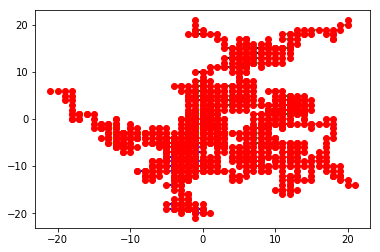

In [182]:
import numpy as np
class Walker:
    Position = (0,0)
    Direction = {}
    Path = [(0,0)]
    #Path = []
    def __init__(self, position):
        self.Direction[1] = (1, 0)
        self.Direction[2] = (-1, 0)
        self.Direction[3] = (0, 1)
        self.Direction[4] = (0, -1)
        self.Position = position
    def getDirection(self):
        Next_Direction = np.random.randint(1, 5)
        direction = self.Direction[Next_Direction]
        return direction
    def walk(self):
        next_step = self.getDirection()
        newX = self.Position[0] + next_step[0]
        newY = self.Position[1] + next_step[1]
        self.Position = (newX, newY)
        self.Path.append(self.Position)
    def Get_Path(self):
        return self.Path
    def Get_Steps(self):
        return len(self.Path)
    def Get_Position(self):
        return self.Position
    
import matplotlib.pyplot as plt
steps = []
tuple_List = []
for i in range(0,5):
    start = (0, 0)
    my_walker = Walker(start)
    my_walker.Path = [(0,0)]
    Walking = True
    while(Walking):
        if(
            my_walker.Get_Position()[0] < -20 or
            my_walker.Get_Position()[0] > 20  or
            my_walker.Get_Position()[1] > 20  or
            my_walker.Get_Position()[1] < -20
        ):
            steps.append(my_walker.Get_Steps())
            tuple_List.append(my_walker.Get_Path())
            Walking = False
            break
        my_walker.walk()
totalSteps = 0
for i in range(len(steps)):
    totalSteps += steps[i]
    print("The ", i+1, "th trail takes ", steps[i], " steps.")
AverageSteps = totalSteps / 5

print("The average steps are: ", AverageSteps, " steps.")
color = ['blue', 'black', 'green', 'yellow', 'red']
for i in range(len(tuple_List)):
    current_tuple = tuple_List[i]
    x_val = [x[0] for x in current_tuple]
    y_val = [x[1] for x in current_tuple]
    plt.plot(x_val,y_val, color = color[i])
    plt.plot(x_val, y_val, 'or')
plt.show()

### Problem 4 - Inverse Transform Sampling (10 Points)

Random sample for any distribution can be generated from a random sample from uniform distribution. This can be done using **Inverse transform Sampling**. For example, suppose you want to create a sample of size $n$ from a _Kumaraswamy distribution_. To obtain this sample:
1. Generate a sample of size $n$ from Uniform[0,1].
2. Identify the inverse of the CDF function of the distribution of your choice (this needs to be done manually and implemented). In our example, it is Kumaraswamy distribution. Call this function ``inverseCDFKumaraswamy()``. Note that you are not allowed to use any routines from ``np.random`` package except ``np.random.uniform``here. This function should take two arguments, first is the sample point, and the second is the distribution parameter value, $\alpha$ and $\beta$.
3. Apply the ``inverseCDFKumaraswamy()`` function on each of the $n$ sample points that you generated in step 1. The $n$ outputs will be the sample from your desired distribution. 

The Probability Density Function (PDF) of the Kumaraswamy distribution is
$$f(x)=\alpha*\beta*x^{\alpha-1}*(1-x^\alpha)^{\beta-1}$$

The Cumulative Distribution Function (CDF) of the Kumaraswamy distribution is
$$F(x)= 1-(1-x^\alpha)^\beta$$

Using the above implementation, generate a sample of size 100 from a Kumaraswamy ($\alpha=2$, $\beta=5$) distribution.

Your output must include the mean, variance and distribution plot (a histogram) for the generated sample. 

0.6997886774315837
0.12263931596871624


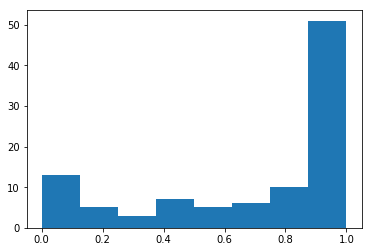

In [176]:
import numpy as np
import random
import statistics as s
n = 100
sample = np.random.uniform(0,1,n)
alpha = 2
beta = 5
def inverseCDFKumaraswamy(sample, alpha,beta):
    y = [None]*len(sample)
    for i in range(len(sample)):
        y[i] = 1 - (1 - sample[i]**alpha)**beta
    return y

sample_Dist = inverseCDFKumaraswamy(sample,2,5)
mean1 = s.mean(sample_Dist)
var1 = s.variance(sample_Dist)
print(mean1)
print(var1)
import matplotlib.pyplot as plt

y = inverseCDFKumaraswamy(sample, 2,5)
plt.hist(y, bins = "auto")
plt.show()
